## Simulación del vendedor de periódicos

In [232]:
from scipy.stats import randint,binom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [233]:
min_venta=6
max_venta=10
precio_compra=200
precio_venta=300



In [234]:
## Generación de demanda
n_exps=10000
vals=randint.rvs(min_venta,max_venta+1,size=n_exps)
# Creamos variables desde min_venta hasta max_venta de tamaño n_exps

In [236]:
# parámetros del modelo
min_venta = 6
max_venta = 10
precio_compra = 200
precio_venta = 250


#generación de demanda
n_exps = 10000
vals = randint.rvs(min_venta, max_venta+1, size=n_exps)
# vals = binom.rvs(n=5, p=0.1, size=n_exps)


In [237]:
# decisión de compra
opc_compra = range(min_venta, max_venta+1)
retornos = pd.DataFrame()

for compra in opc_compra:
    lista_retornos = []
    for venta in vals:
        lista_retornos.append(precio_venta*min(compra,venta) - precio_compra*compra )
    retornos[str(compra)] = lista_retornos

retornos.head()


,6,7,8,9,10
0,300,350,150,-50,-250
1,300,350,400,200,0
2,300,100,-100,-300,-500
3,300,350,150,-50,-250
4,300,350,400,450,250


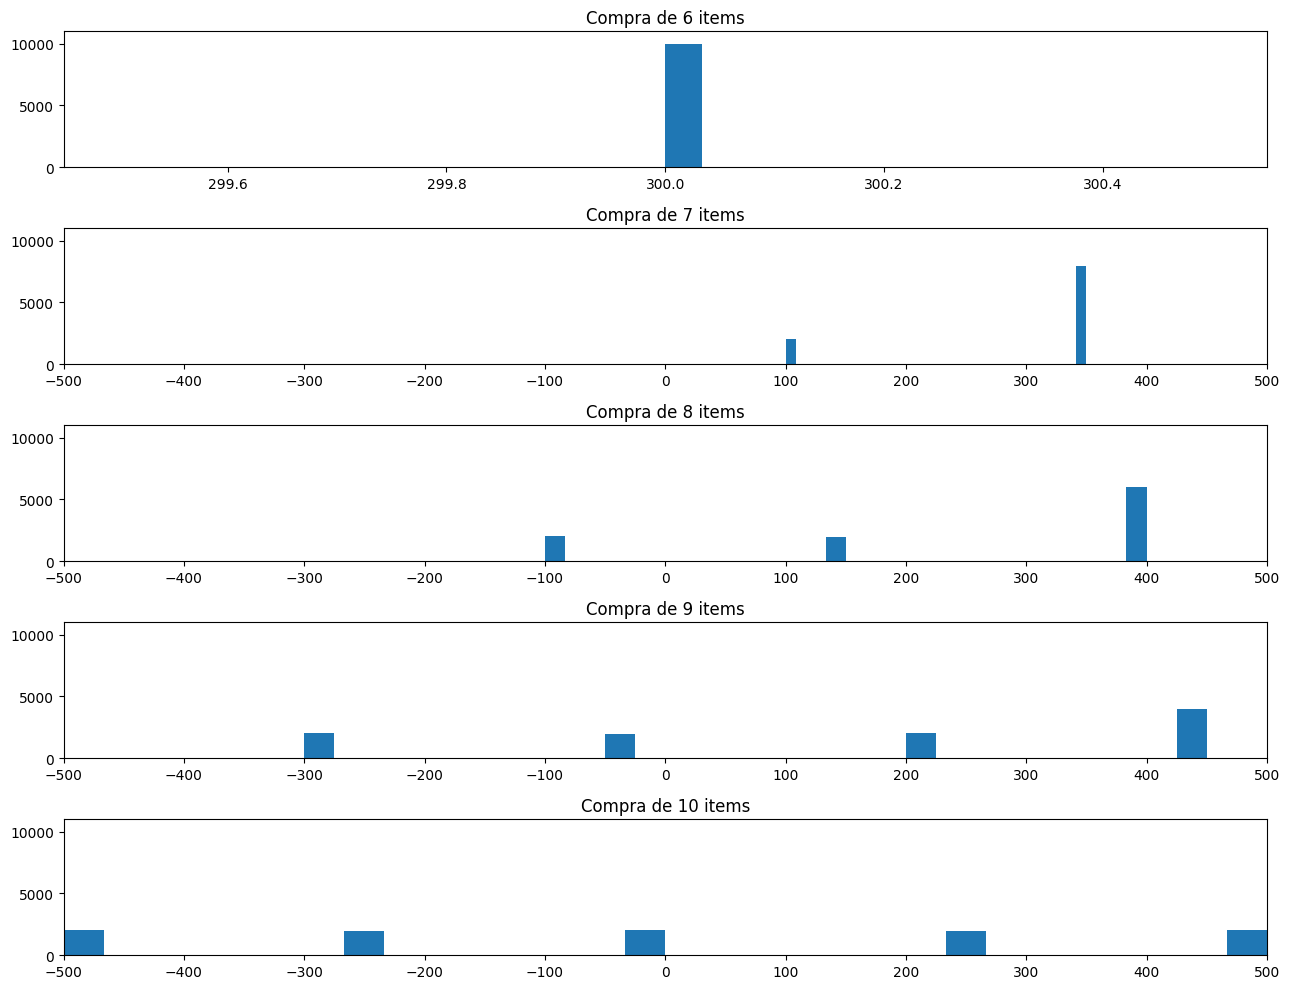

In [238]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(13, 10))
i = 0
for compra in opc_compra:
    # histograma
    axes[i].hist(x=retornos[str(compra)], bins=30)
    axes[i].set_title("Compra de {} items".format(compra))
    
    axes[i].set_ylim([0, 11000])
    if i>0:
        axes[i].set_xlim([-500, 500])
        axes[i].set_xticks(range(-500,600,100)) 
    i=i+1

fig.tight_layout()
plt.show()


## Taller en Clase

     6    7    8    9    10
0  300  100 -100 -300  -500
1 -300 -500 -700 -900 -1100
2    0 -200 -400 -600  -800
3    0 -200 -400 -600  -800
4  300  100 -100 -300  -500
6     154.05
7     -45.95
8    -245.95
9    -445.95
10   -645.95
dtype: float64


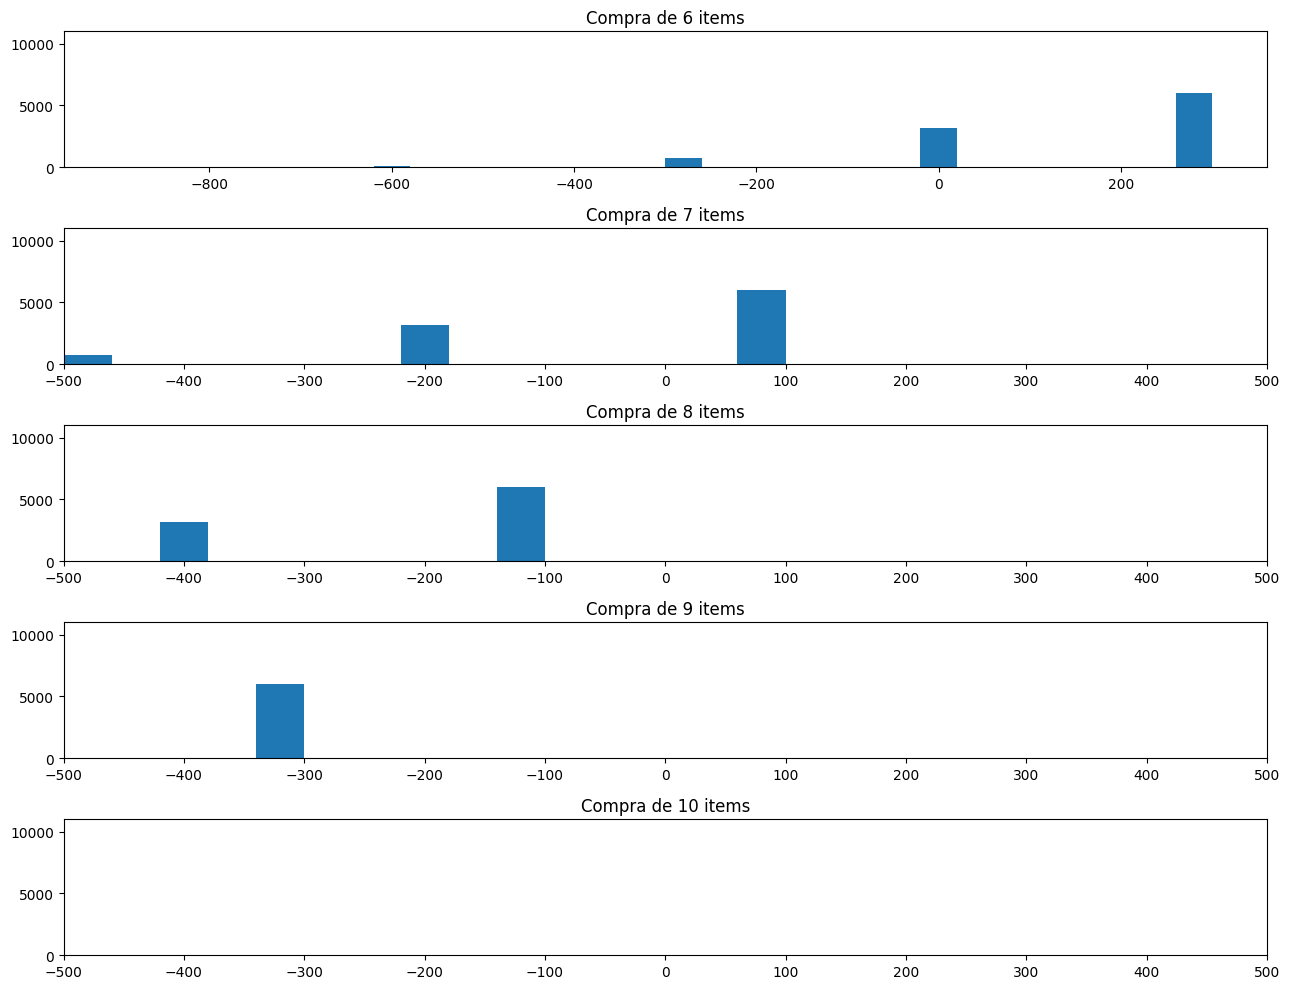

In [263]:
from scipy.stats import randint,binom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


min_venta = 6
max_venta = 10
precio_compra = 200
precio_venta = 300
n_exps = 10000

# Set a random seed for reproducibility

np.random.seed(42)

vals = binom.rvs(n=5, p=0.9, size=n_exps)

opc_compra = range(min_venta, max_venta + 1)
retornos = pd.DataFrame()

for compra in opc_compra:
    lista_retornos = []
    for venta in vals:
        lista_retornos.append(precio_venta * min(compra, venta) - precio_compra * compra)
    retornos[str(compra)] = lista_retornos


print(retornos.head())



# Calculate and print the expected values
expected_values = retornos.mean()
print(expected_values)




fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(13, 10))

i = 0
for compra in opc_compra:
    # histograma
    axes[i].hist(x=retornos[str(compra)], bins=30)
    axes[i].set_title("Compra de {} items".format(compra))
    
    axes[i].set_ylim([0, 11000])
    if i>0:
        axes[i].set_xlim([-500, 500])
        axes[i].set_xticks(range(-500,600,100)) 
    i=i+1

fig.tight_layout()
plt.show()





(array([2.000e+00, 0.000e+00, 7.300e+01, 0.000e+00, 0.000e+00, 7.190e+02,
        0.000e+00, 3.200e+03, 0.000e+00, 6.006e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

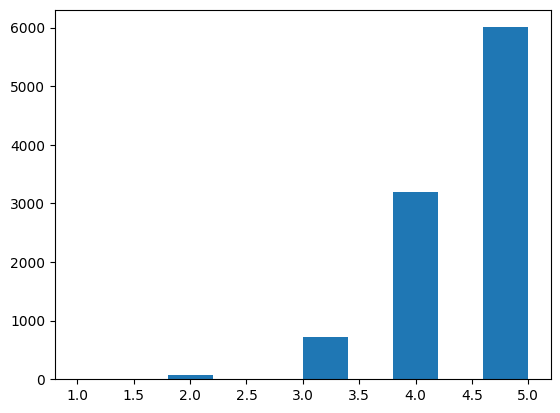

In [256]:
plt.hist(vals)

Cuando asignamos una probabilidad de exito $p$ a un valor muy pequeño, estamos simulando una situación donde cada intento tiene una baja probabhilidad de ser un exito. En la mayoría de los eventos, esperamos un valor de fracaso.
Con p=0.1 esperamos que las compras sean muy pequeñas.

Para valores más grandes de p, observamos que la probabilidad de exito aumenta. Haciendo que cada escenario en la simulación sea más probable en incurrir en exito.  Y vemos un valor esperado positivo para el retorno en este caso.